# load wav sound

In [147]:
import numpy as np
import soundfile as sf
from glob import glob
from matplotlib import pyplot as plt
import seaborn
import os

In [46]:
%matplotlib inline

In [80]:
wav_files = glob('../Voice/*.wav')

In [195]:
wav_files

['../Voice/Witherspoon.wav',
 '../Voice/farend_Diaz2.wav',
 '../Voice/farend_Diaz1.wav',
 '../Voice/nearend_Wither5.wav',
 '../Voice/Clooney_3.wav',
 '../Voice/Sparks.wav',
 '../Voice/Orlando_Bloom.wav',
 '../Voice/nearend_Clooney5.wav',
 '../Voice/nearend_Diaz3.wav',
 '../Voice/nearend_Sparks2.wav',
 '../Voice/tes.wav',
 '../Voice/nearend_Neylon1.wav',
 '../Voice/Neylon_3.wav',
 '../Voice/Diaz.wav',
 '../Voice/farend_Sparks3.wav',
 '../Voice/nearend6.wav',
 '../Voice/farend_Sparks4.wav',
 '../Voice/nearend_Orland.wav']

In [197]:
data, freq = sf.read(wav_files[0])

In [203]:
data[0, :]

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       ...,
       [3.05175781e-05, 3.05175781e-05],
       [3.05175781e-05, 3.05175781e-05],
       [3.05175781e-05, 3.05175781e-05]])

In [202]:
freq

44100

In [108]:
def load_wav(wav_file, freq=None):
    wav, data_fs = sf.read(wav_file)
    if freq is not None:
        wav = wav[::np.int(np.floor(data_fs / freq))]
    else:
        freq = data_fs
    # make sound monoral
    if len(wav.shape) != 1:
        wav = wav[:, 0]
    return wav, freq

def plot_wav(wav_data, freq):
    assert len(wav.shape) == 1
    plt.figure(0, figsize=(6, 4))
    plt.plot(wav_data)
    plt.grid()
    
    interval = 10
    length_sec = int(len(wav_data)/freq) + 1
    interval = min(10, length_sec)
    ind_1 = np.arange(0, length_sec+1, int(length_sec/interval))
    ind_2 = ind_1 * freq
    plt.xticks(ind_2, ind_1)
    plt.xlim([0, len(wav_data)])
    plt.xlabel("Time (sec.): total %0.2f" % (len(wav_data)/freq))
    plt.ylabel("Amplitude")

#     plt.savefig("./figure/fig11a.eps", bbox_inches="tight")
#     plt.savefig("./figure/fig11a.png", bbox_inches="tight")
    plt.show()

## Low pass filter

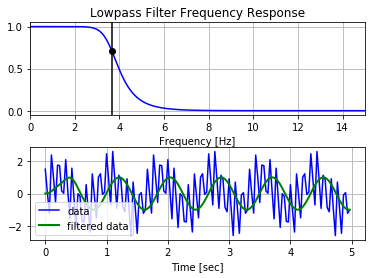

In [106]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)


# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

../Voice/Witherspoon.wav


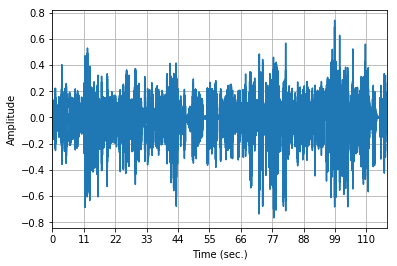

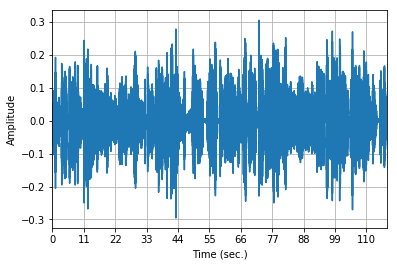

../Voice/farend_Diaz2.wav


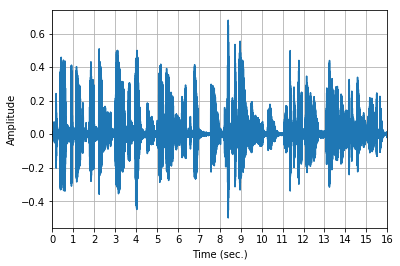

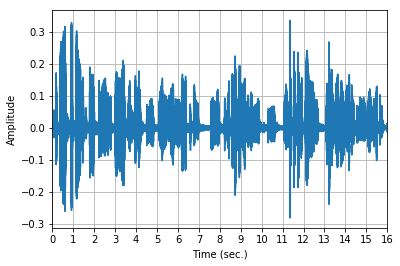

../Voice/farend_Diaz1.wav


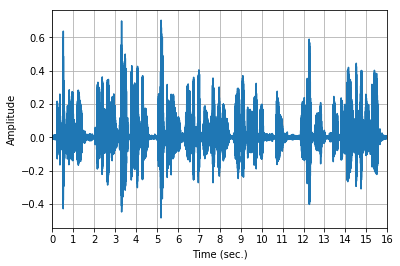

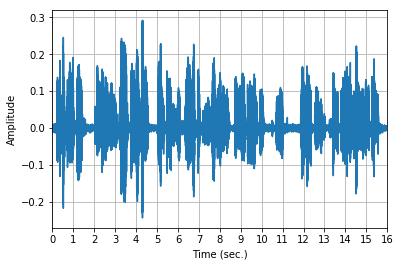

../Voice/nearend_Wither5.wav


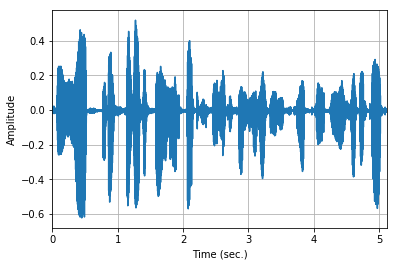

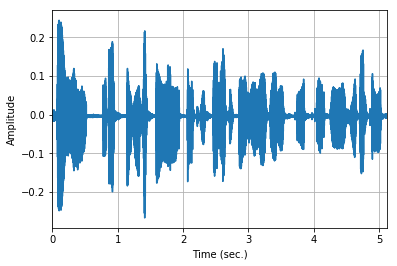

../Voice/Clooney_3.wav


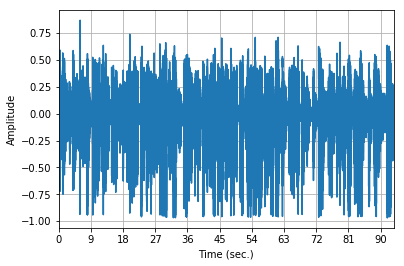

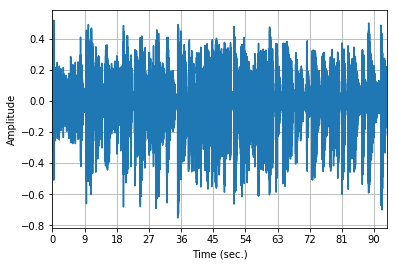

In [94]:
cutoff = 500  # freq

for n, _file in enumerate(wav_files):
    print(_file)
    wav, freq = load_wav(_file)
    plot_wav(wav, freq)
    wav = butter_lowpass_filter(wav, cutoff, freq, 6)
    plot_wav(wav, freq)
    if n > 3:
        break

## Cut off silent interval

In [184]:
def amplitude_filter(wav_data,
                     amp_th,
                     silence_interval):
    assert amp_th > 0
    wav_data_mask = (np.abs(wav_data) > amp_th)
    
    flg = False
    count = 0
    index = []
    for n, m in enumerate(wav_data_mask):
        if m and flg:
            if silence_interval > count:
                wav_data_mask[index] = True
            count = 0
            flg = False
            index = []
        if not m:
            flg = True
            count += 1
            index.append(n)
    if flg and silence_interval < count:
        wav_data_mask[index] = True
    wav_data_masked = wav_data[wav_data_mask]
    return wav_data_masked


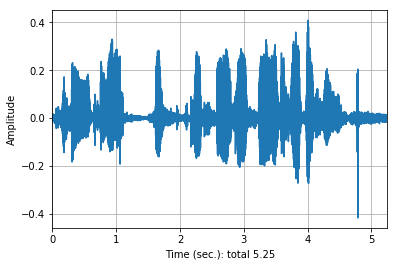

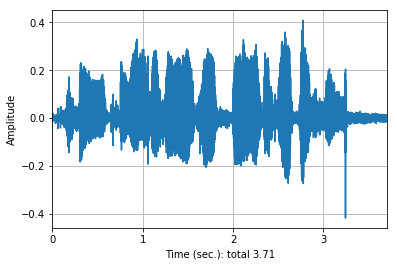

In [218]:
# 7 and 0.3
silence_int = 0.2
_file = wav_files[8]
wav, freq = load_wav(_file)
plot_wav(wav, freq)

silence_interval = int(silence_int*freq)
wav_masked = amplitude_filter(wav, 0.1, silence_interval)
plot_wav(wav_masked, freq)


## Test audio

In [219]:
import IPython.display

In [220]:
IPython.display.Audio(_file)

In [221]:
test = os.path.join('../Voice', os.path.basename(_file))
test = test.replace('.wav', '_edit.wav')
sf.write(test, wav_masked, freq, 'PCM_24')
IPython.display.Audio(test)